0.9932 accuracy per iteration
0.9987 accuracy per iteration
0.9997 accuracy per iteration
0.999 accuracy per iteration
0.9994 accuracy per iteration
0.9996 accuracy per iteration
0.9997 accuracy per iteration
0.9995 accuracy per iteration
1.0 accuracy per iteration
0.9995999599959996 accuracy per iteration
Accuracy: 0.5618
[Split 1]
Accuracy: 0.9988
[Split 2]
Accuracy: 0.9988
[Split 3]
Accuracy: 0.9988
[Split 4]
Accuracy: 0.9988
[Split 5]
Accuracy: 0.9988
[Split 6]
Accuracy: 0.9988
[Split 7]
Accuracy: 0.9988
[Split 8]
Accuracy: 0.9988
[Split 9]
[[19937    39]
 [   24     0]]
0.99685


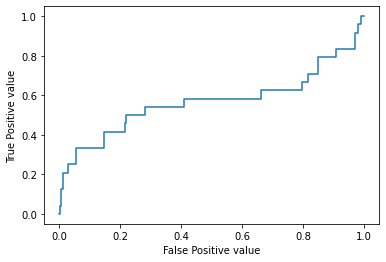

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import sklearn.metrics
from sklearn.model_selection import train_test_split
import math
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
data = pd.read_csv("datafinal.csv")
correlation = data.corr()


data["type"] = data["type"].map({"CASH_OUT": 1, "PAYMENT": 2,"CASH_IN": 3, "TRANSFER": 4,"DEBIT": 5})
data["isFraud"] = data["isFraud"].map({0: "No Fraud", 1: "Fraud"})
data.drop(['nameOrig','nameDest'],axis=1,inplace=True)
X=data.drop('isFraud',axis=1)
y=data['isFraud']
for i in range(1,7):
    max_X=max(X.iloc[:,i])
    min_X=min(X.iloc[:,i])
    X.iloc[:,i]=(X.iloc[:,i]-min_X)/(max_X-min_X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
X_cv, X_test_new=np.split(X_test, 2)
Y_cv , Y_test_new=np.split(y_test, 2)

y_train_new=np.zeros(len(y_train))
for i in range (len(y_train)):
    if y_train.iloc[i] == 'Fraud':
        y_train_new[i] =1  
y_train_new=pd.DataFrame(y_train_new)
Y_cv_new=np.zeros(len(Y_cv))
for i in range (len(Y_cv)):
    if Y_cv.iloc[i] == 'Fraud':
        Y_cv_new[i] =1  
Y_test_new_1=np.zeros(len(Y_cv))
for i in range (len(Y_test_new)):
    if Y_test_new.iloc[i] == 'Fraud':
        Y_test_new_1[i] =1


def generateXvector(X):
   
    vectorX = np.c_[np.ones((len(X), 1)), X]
    return vectorX
def theta_init(X):

    theta = np.random.randn(X+1, 1)
    return theta

def sigmoid_function(X):

    return 1/(1+math.e**(-X))
def Logistics_Regression(X,y,learningrate, iterations):
        
    y_new = y
    cost_lst = []
    vectorX = generateXvector(X)
    theta = theta_init(len(X.iloc[0,:]))
    m = len(X)
    for i in range(iterations):
        gradients = 2/m * vectorX.T.dot(sigmoid_function(vectorX.dot(theta)) - y_new)
        theta = theta - learningrate * gradients
        y_pred = sigmoid_function(vectorX.dot(theta))
        cost_value = - np.sum(np.dot(y_new.T,np.log(y_pred)+ np.dot((1-y_new).T,np.log(1-y_pred)))) /(len(y_pred))
 
        cost_lst.append(cost_value)
        
  
    return theta, cost_value

theta1, cost_value1=Logistics_Regression(X_train,y_train_new,0.03, 100)
def root_regularization(y_pred,y_test,theta):
    cost_reg=100
    best_lamda=0
    lamda=np.array([0.01,0.02,0.04,0.08,0.16,0.32,0.64,1.28,2.56,5.12,10.24])
    cost_lst = []
    N = len(y_test)
    for l in range(np.size(lamda)):
        term=(lamda[l]/2*N)*(np.sum(theta**2))
        cost_value = (- np.sum(np.dot(y_test.T,np.log(y_pred)+ np.dot((1-y_test).T,np.log(1-y_pred)))) /(len(y_pred)))+term
        cost_lst.append(cost_value)
        if cost_value<cost_reg:
            cost_reg=cost_value
            best_lamda=lamda[l]
    return best_lamda,cost_reg

def rmse(y_pred,y_test):
    cost_value = (- np.sum(np.dot(y_test.T,np.log(y_pred)+ np.dot((1-y_test).T,np.log(1-y_pred)))) /(len(y_pred)))
    return cost_value

cost_cv=100
theta1_cv=[]
for j in range(9):
    vectorX=generateXvector(X_cv.iloc[:,0:j])
    theta2, cost_value1=Logistics_Regression(X_train.iloc[:,0:j],y_train_new,0.03, 100)
   
    y_pred = sigmoid_function(vectorX.dot(theta2))#calculate hypothesis using best thetas
    best_lamda,cost_reg=root_regularization(y_pred,Y_cv_new,theta2)
    if cost_value1<cost_cv:
        cost_cv=cost_value1
        theta1_cv=theta2
    if cost_reg<cost_cv:
        cost_cv=cost_reg
        theta1_cv=theta2
y_pred_test=sigmoid_function(np.dot(X_test_new.iloc[:,0:np.size(theta1_cv)], theta1_cv))
cost_Y_test=rmse(y_pred_test,Y_test_new_1)
cost_test_reg=rmse(y_pred_test,Y_test_new_1)+(best_lamda/2*len(Y_cv))*(np.sum(theta1_cv**2))

skfolds = KFold(n_splits=10)
splits = skfolds.split(X, y)
for i, (train_index, test_index) in enumerate(splits): #split and shuffle the data  
  x_train = X.iloc[train_index]
  y_train = y.iloc[train_index]
  x_test  = X.iloc[test_index]
  y_test  = y.iloc[test_index]
  clf = LogisticRegression()
  clf.fit(x_train, y_train)
  y_pred = clf.predict(x_test)
  accuracy = np.mean(y_pred == y_test)
  print(accuracy,'accuracy per iteration')

skfolds_1 = StratifiedKFold(n_splits=9)
splits_1 = skfolds_1.split(X, y)
for i, (train_index, test_index) in enumerate(splits_1):  
  x_train = X.iloc[train_index]
  y_train = y.iloc[train_index]
  x_test  = X.iloc[test_index]
  y_test  = y.iloc[test_index]
  clf_1 = LogisticRegression()
  clf_1.fit(x_train, y_train)
  y_pred_1 = clf_1.predict(x_test)
  accuracy = np.mean(y_pred_1 == y_test)
  print("Accuracy: %.4f"%accuracy)
  print("[Split %d]"%(i+1))

print(sklearn.metrics.confusion_matrix(Y_test_new_1,np.round((y_pred_test))))
print(accuracy_score(Y_test_new_1, np.round((y_pred_test))) )



fpr, tpr, _ = metrics.roc_curve(Y_test_new_1,  y_pred_test)
plt.figure()
plt.plot(fpr,tpr)
plt.ylabel('True Positive value')
plt.xlabel('False Positive value')
plt.show()
